In [2]:
import math

def get_polar_deltas(curr_pos, goal_pos):
  """
  Calculates the change in radius (d_r) and change in angle (d_theta) between two positions in polar coordinates.

  Args:
      curr_pos: A tuple (x, z) representing the current position.
      goal_pos: A tuple (x, z) representing the goal position.

  Returns:
      A tuple containing d_r (change in radius) and d_theta (change in angle) as floats.
  """

  curr_x, curr_z = curr_pos
  goal_x, goal_z = goal_pos

  # Calculate current radius and angle
  curr_radius = math.sqrt(curr_x**2 + curr_z**2)  # Consider z for 3D space
  curr_angle = math.atan2(curr_x, curr_z)  # Adjust for proper quadrant handling

  # Calculate goal radius and angle
  goal_radius = math.sqrt(goal_x**2 + goal_z**2)  # Consider z for 3D space
  goal_angle = math.atan2(goal_x, goal_z)  # Adjust for quadrant handling

  # Calculate change in radius (d_r)
  d_r = goal_radius - curr_radius

  # Calculate change in angle (d_theta)
  # Handle potential angle wrapping around the circle (e.g., -pi to pi)
  d_theta = goal_angle - curr_angle
  d_theta = (d_theta + math.pi) % (2 * math.pi) - math.pi  # Normalize to -pi to pi range

  return d_r, d_theta

# Example usage
current_pos = (0.0, 0.0)  # Assuming x, z coordinates
goal_pos = (0.0, 1.0)
d_r, d_theta = get_polar_deltas(current_pos, goal_pos)
print(f"Change in radius (d_r): {d_r:.2f}")
print(f"Change in angle (d_theta): {d_theta*57.3:.2f} radians")

Change in radius (d_r): 1.00
Change in angle (d_theta): 0.00 radians


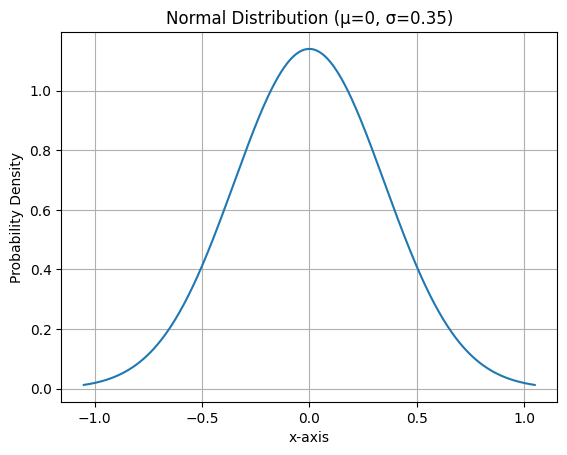

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define mean and standard deviation
mu = 0
sigma = 0.35

# Create x-axis values covering a range around the mean
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 400)

# Calculate probability density for each x value using norm.pdf
y = norm.pdf(x, loc=mu, scale=sigma)

# Configure and display the plot
plt.plot(x, y)
plt.xlabel("x-axis")
plt.ylabel("Probability Density")
plt.title("Normal Distribution (μ={}, σ={})".format(mu, sigma))
plt.grid(True)
plt.show()


In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm  # For colormap
from scipy.stats import multivariate_normal

def multivariate_normal_weighted(mean=(0, 0), cov=None, weight_x=1.0, weight_y=1.0):
  return multivariate_normal(mean=mean, cov=cov if cov is not None else ([weight_x ** 2, 0], [0, weight_y ** 2])).pdf

# Create a meshgrid for evaluation points
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Create a 2D normal distribution object
pdf = multivariate_normal_weighted(weight_x=0.4, weight_y=0.4)

# Evaluate the distribution at each grid point
z = pdf(np.dstack([X, Y]))  # Combine X and Y into a 3D array for evaluation

# Configure and display the 2D plot
fig, ax = plt.subplots()
cmap = cm.get_cmap('YlGnBu')  # Choose a colormap (adjust as needed)
surf = ax.contourf(X, Y, z, cmap=cmap)
ax.set_title('2D Normal Distribution')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Add a colorbar to visualize the probability density
fig.colorbar(surf, label='Probability Density')
plt.show()


TypeError: multivariate_normal_weighted() got an unexpected keyword argument 'mu'